In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import scipy.linalg as linalg
import pandas as pd

/Users/ideakadikoy/Desktop/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
# Load the data points and class labels

X_train = np.genfromtxt(fname = "/Users/ideakadikoy/Desktop/hw02_data_points.csv", delimiter = ",", dtype = float)
y_train = np.genfromtxt(fname = "/Users/ideakadikoy/Desktop/hw02_class_labels.csv", delimiter = ",", dtype = int)

In [6]:
# STEP 3
# assuming that there are K classes
# should return a numpy array with shape (K,)
def estimate_prior_probabilities(y):
    # your implementation starts below
    class_priors = []
    for i in range(1, 6):
        class_priors.append(sum(y == i) / len(y))
    # your implementation ends above
    return(class_priors)

class_priors = estimate_prior_probabilities(y_train)
print(class_priors)

[0.2, 0.2, 0.2, 0.2, 0.2]


In [18]:
# STEP 4
# assuming that there are K classes and D features
# should return a numpy array with shape (K, D)
def estimate_class_means(X, y):
    # your implementation starts below
    num_classes = len(np.unique(y))
    sample_means = np.zeros((num_classes, X.shape[1]))
    
    for i in range(num_classes):
        sample_means[i,:] = np.mean(X[y==i+1], axis=0)
    # your implementation ends above
    return(sample_means)

sample_means = estimate_class_means(X_train, y_train)
print(sample_means)

[[ -6.64451313 -26.36348034]
 [-42.59684357  -3.08704541]
 [-15.33132145  34.74988518]
 [ 35.28039812  28.29476758]
 [ 29.29228003 -33.59412701]]


In [13]:
# STEP 5
# assuming that there are K classes and D features
# should return a numpy array with shape (K, D, D)
def estimate_class_covariances(X, y):
    # your implementation starts below
    K = len(np.unique(y))
    D = X.shape[1]
    sample_covariances = np.zeros((K, D, D))
    
    for k in range(K):
        X_k = X[y == k+1]
        mean_k = np.mean(X_k, axis=0)
        covariance_k = (X_k - mean_k).T @ (X_k - mean_k) / len(X_k)
        sample_covariances[k] = covariance_k
    # your implementation ends above
    return(sample_covariances)

sample_covariances = estimate_class_covariances(X_train, y_train)
print(sample_covariances)

[[[ 268.24169454   84.38622865]
  [  84.38622865  165.60007039]]

 [[ 268.36399098  -79.36361871]
  [ -79.36361871  228.81216241]]

 [[ 257.88530822  107.48459802]
  [ 107.48459802  270.90303479]]

 [[ 390.64688372 -143.01194574]
  [-143.01194574  159.85719588]]

 [[  62.29030005    8.10502983]
  [   8.10502983  379.25858684]]]


In [15]:
# STEP 6
# assuming that there are N data points and K classes
# should return a numpy array with shape (N, K)
from scipy.stats import multivariate_normal

def calculate_score_values(X, class_means, class_covariances, class_priors):
    # your implementation starts below
    K = len(class_priors)
    N = X.shape[0]
    score_values = np.zeros((N, K))
    for k in range(K):
        score_values[:, k] = multivariate_normal.logpdf(X, mean=class_means[k], cov=class_covariances[k]) + np.log(class_priors[k])
    # your implementation ends above
    return(score_values)

scores_train = calculate_score_values(X_train, sample_means,
                                      sample_covariances, class_priors)
print(scores_train)

[[-14.19538107 -22.10065254 -32.17093002 -22.95654712  -9.69739781]
 [-13.31824343 -21.10515229 -30.34378865 -22.68609467  -9.16710182]
 [-15.84197823 -20.97522186 -36.85943093 -35.44103047  -8.93068396]
 ...
 [-21.2864439  -33.52980121 -17.3443919   -9.47618622 -16.51638154]
 [-15.17110159 -24.16805014 -16.72250881  -9.40819221 -11.97010383]
 [-20.31293361 -31.85967687 -16.98927511  -9.1391833  -15.61253304]]


[[  0.   0.   0.   0.   0.]
 [829.  46.   0.   0. 125.]
 [136. 785.  79.   0.   0.]
 [  0. 147. 791.  62.   0.]
 [  0.   0. 135. 865.   0.]]


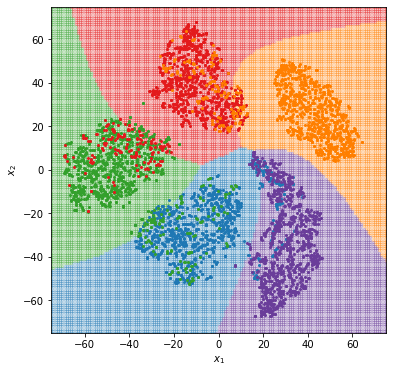

In [17]:
# STEP 7
# assuming that there are K classes
# should return a numpy array with shape (K, K)
def calculate_confusion_matrix(y_truth, scores):
    # your implementation starts below
    n_classes = scores.shape[1]
    confusion_matrix = np.zeros((n_classes, n_classes))
    y_pred = np.argmax(scores, axis=1)

    # calculate the confusion matrix
    for i in range(n_classes):
        for j in range(n_classes):
            confusion_matrix[i, j] = np.sum((y_truth == i) & (y_pred == j))

    # your implementation ends above
    return(confusion_matrix)

confusion_train = calculate_confusion_matrix(y_train, scores_train)
print(confusion_train)



def draw_classification_result(X, y, class_means, class_covariances, class_priors):
    class_colors = np.array(["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a"])
    K = np.max(y)

    x1_interval = np.linspace(-75, +75, 151)
    x2_interval = np.linspace(-75, +75, 151)
    x1_grid, x2_grid = np.meshgrid(x1_interval, x2_interval)
    X_grid = np.vstack((x1_grid.flatten(), x2_grid.flatten())).T
    scores_grid = calculate_score_values(X_grid, class_means, class_covariances, class_priors)

    score_values = np.zeros((len(x1_interval), len(x2_interval), K))
    for c in range(K):
        score_values[:,:,c] = scores_grid[:, c].reshape((len(x1_interval), len(x2_interval)))

    L = np.argmax(score_values, axis = 2)

    fig = plt.figure(figsize = (6, 6))
    for c in range(K):
        plt.plot(x1_grid[L == c], x2_grid[L == c], "s", markersize = 2, markerfacecolor = class_colors[c], alpha = 0.25, markeredgecolor = class_colors[c])
    for c in range(K):
        plt.plot(X[y == (c + 1), 0], X[y == (c + 1), 1], ".", markersize = 4, markerfacecolor = class_colors[c], markeredgecolor = class_colors[c])
    plt.xlim((-75, 75))
    plt.ylim((-75, 75))
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")
    plt.show()
    return(fig)
    
fig = draw_classification_result(X_train, y_train, sample_means, sample_covariances, class_priors)
fig.savefig("hw02_result_different_covariances.pdf", bbox_inches = "tight")

[[[1088.7724787   -46.85767937]
  [ -46.85767937 1009.14155144]]

 [[1088.7724787   -46.85767937]
  [ -46.85767937 1009.14155144]]

 [[1088.7724787   -46.85767937]
  [ -46.85767937 1009.14155144]]

 [[1088.7724787   -46.85767937]
  [ -46.85767937 1009.14155144]]

 [[1088.7724787   -46.85767937]
  [ -46.85767937 1009.14155144]]]
[[-11.46793996 -13.90222671 -13.76045065 -12.04097548 -10.48248827]
 [-11.32991837 -13.62530355 -13.50637918 -11.94332728 -10.45947009]
 [-11.34232183 -13.92476829 -14.67342885 -13.22089383 -10.49857077]
 ...
 [-13.6968323  -14.84896905 -12.0931904  -10.47805967 -12.95656273]
 [-12.1627728  -13.33771435 -11.61361575 -10.46378924 -11.7028491 ]
 [-13.43558046 -14.56759373 -11.96475973 -10.44324505 -12.75521448]]
[[  0.   0.   0.   0.   0.]
 [833.  26.   0.  38. 103.]
 [142. 836.  22.   0.   0.]
 [  0. 174. 804.  22.   0.]
 [  0.   0. 148. 852.   0.]]


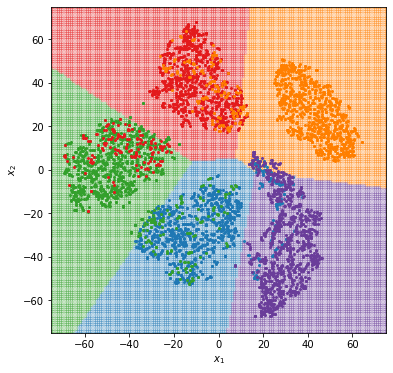

In [22]:
def estimate_shared_class_covariance(X, y):
    K = np.max(y)
    D = X.shape[1]
    grand_mean = np.mean(X, axis=0)
    sample_covariance = np.zeros((D, D))
    for c in range(K):
        X_c = X[y == c+1]
        centered_data = X_c - grand_mean
        sample_covariance += (centered_data.T @ centered_data) / len(X)
    sample_covariances = np.tile(sample_covariance, (K, 1, 1))
    return(sample_covariances)

sample_covariances = estimate_shared_class_covariance(X_train, y_train)
print(sample_covariances)

scores_train = calculate_score_values(X_train, sample_means,
                                      sample_covariances, class_priors)
print(scores_train)

confusion_train = calculate_confusion_matrix(y_train, scores_train)
print(confusion_train)

fig = draw_classification_result(X_train, y_train, sample_means, sample_covariances, class_priors)
fig.savefig("hw02_result_shared_covariance.pdf", bbox_inches = "tight")